# COGS 108 - Project Proposal

# Names & GitHub ID

- Name: Steven Liu
- GitHub Username: sdevinl

# Research Question

Street food has been popular in America for a long time, and it is still continuing to bloom. Despite this popularity, there has been an idea that among food trucks and sidewalk stands are dirty.

Are food trucks, stands, and pushcarts as clean as restaurants?

## Background and Prior Work

In Boston, street food resulted to be just as safe if not safer than restaraunts according to a report from  Institute for Justice, a non-profit civil liberties law firm. (Reference 1)

Street Eats, Safe Eats tests that common, but unsubstantiated claim by reviewing more than 260,000 food-safety inspection reports from seven large American cities and found results where food trucks and carts did as well or even better than restaurants. (Reference 2)

Based on the results found in a research report, food trucks and carts actually had about half as many average violations as restaurants. (Reference 3)

References:
- 1) https://www.bostonmagazine.com/health/2014/06/11/study-food-trucks-cleaner-restaurants/#:~:text=Study%3A%20Food%20Trucks%20are%20Cleaner,not%20cleaner%2C%20than%20many%20restaurants.

- 2) https://ij.org/report/street-eats-safe-eats/#:~:text=and%20hurt%20consumers.-,Results,%2Dand%2Dmortar%20food%20establishments.

- 3) https://www.eater.com/2014/6/16/6206837/new-study-shows-food-trucks-are-safer-than-restaurants

# Hypothesis


Based on the results from prior work, we can see that food trucks, and carts were just as safe, if not safer than restaraunts. This leads me to believe that after performing my analysis, I would obtain similar results where the food safety scores of food trucks, stands, and pushcarts will be just as high as restaraunts, if not higher. 

# Data

I will be using the inspections.csv file. It contains the information that was recorded from previous inspections. There are 18466 inspections, and for each inspection, they recorded 36 features. Each inspection contains restaurant details that help identify the restaurant and inspector details that list the results of the inspection as well as some results from previous inspections. For example, a few restaurant details are the name, address, facility type, and phone number of the restaurant. Some inspection details would include the inspector name, whether the state of the restaurant is critical, number of previous critical records and the food score. The features contains timestamps for things such as the date of the inspections, and the date that the restaurant opened. Strings for features that contain names and addresses. There will also be numerical values used to record the number of criticals. In this dataset, we will be interested in 3 features. The hsisid as the numerical identifier for a restaurant, the facility type, used to split the data into mobile establishments and restaurants, and score, which is the inspector health score that we will use to measure the safeness of each establishment.

# Setup

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.stats.weightstats as stats
import seaborn as sns

In [125]:
try : 
    inspections = pd.read_csv('inspections.csv')
except:
    inspections = pd.read_csv('data/inspections.csv')

# Data Cleaning 

In [126]:
inspections.shape
inspections.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


We can see there 18466 rows and 36 features in the data.

In [127]:
inspections.columns

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')

In [128]:
inspections['facilitytype'].unique()

array(['Restaurant', 'Food Stand', 'Public School Lunchrooms',
       'Institutional Food Service', 'Meat Market',
       'Private School Lunchrooms', 'Elderly Nutrition Sites (catered)',
       'Mobile Food Units', 'Pushcarts', 'Limited Food Service'],
      dtype=object)

There are many facility types that are not related to our analysis. We will filter them now, so we can process the data quicker later on.

In [129]:
target_types = ['Mobile Food Units', 'Pushcarts', 'Food Stand', 'Restaurant']
data = inspections[(inspections['facilitytype'].isin(target_types))]
data['facilitytype'].unique()

array(['Restaurant', 'Food Stand', 'Mobile Food Units', 'Pushcarts'],
      dtype=object)

Based on my research question, I am only interested in 3 features. The hsisid because it is the identifier of each establishment, score because it will be used as a measurement for the safety of an establishment, and facility type as it will be used to seperate the two groups of data. 

In [130]:
data = data[['hsisid', 'score', 'facilitytype']].sort_values(by='hsisid', ascending=True)
data.head()

,hsisid,score,facilitytype
2923,4092010018,94.5,Restaurant
15404,4092010018,91.5,Restaurant
12545,4092010018,94.5,Restaurant
8941,4092010018,91.0,Restaurant
6103,4092010018,97.5,Restaurant


Here, we can get a sense of the average food score among facility types.

In [131]:
data.groupby(['facilitytype']).mean()['score'].reset_index()

,facilitytype,score
0,Food Stand,96.828620
1,Mobile Food Units,97.112676
2,Pushcarts,98.106299
3,Restaurant,95.665582


The average scores among the facility types are pretty close which matches our hypothesis.

Knowing that each row is an inspection, we expect that establishments will be inspected multiple times. This will lead to duplicate hsisid values in the dataset. We take the average of all food scores for each establishment to use in our analysis.

In [132]:
grouped_data = data.groupby(['hsisid', 'facilitytype']).mean().reset_index()
grouped_data

,hsisid,facilitytype,score
0,4092010018,Restaurant,94.333333
1,4092010024,Restaurant,94.772727
2,4092010031,Restaurant,94.375000
3,4092010035,Restaurant,94.500000
4,4092010037,Restaurant,96.400000
...,...,...,...
2716,4092040329,Pushcarts,98.000000
2717,4092040332,Pushcarts,99.250000
2718,4092040335,Pushcarts,97.000000
2719,4092040336,Pushcarts,99.500000


After grouping the data, and filtering facility types, we are left with 2721 rows of data.

# Data Analysis & Results

### EDA

Let's look at the distribution among facility types

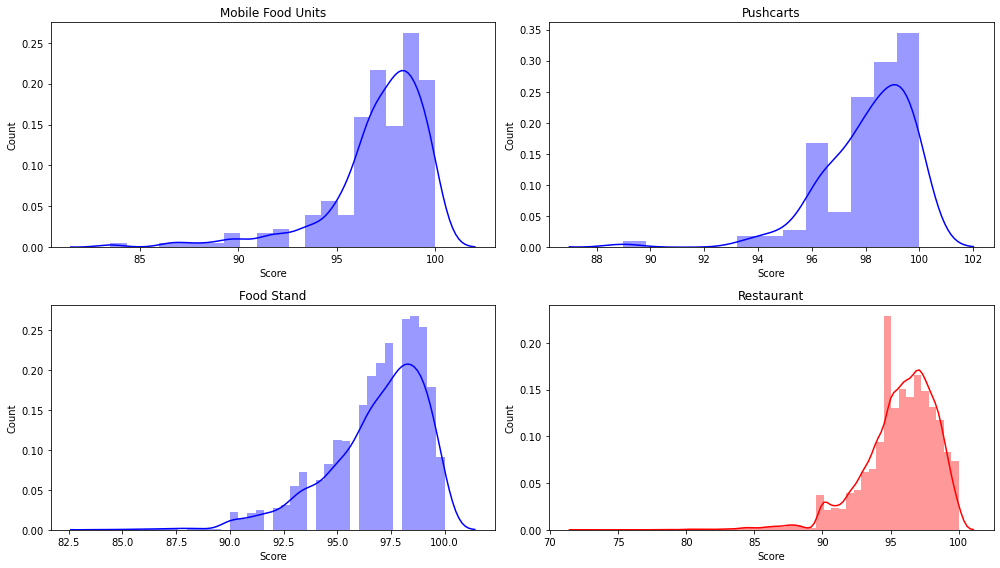

In [133]:
# Initiate Plot
fig = plt.figure(figsize=(14,8))
fig_num = 220

for target in target_types:
    fig_num += 1
    ax = fig.add_subplot(fig_num)
    
    if target == 'Restaurant':
        color = 'red'
    else:
        color = 'blue'

    sns.distplot(data[data['facilitytype'] == target]['score'], color=color)
    
    plt.title(target)
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.tight_layout()

Since we're more interested in assocating all mobile establishments, let's explore what the data looks like then.

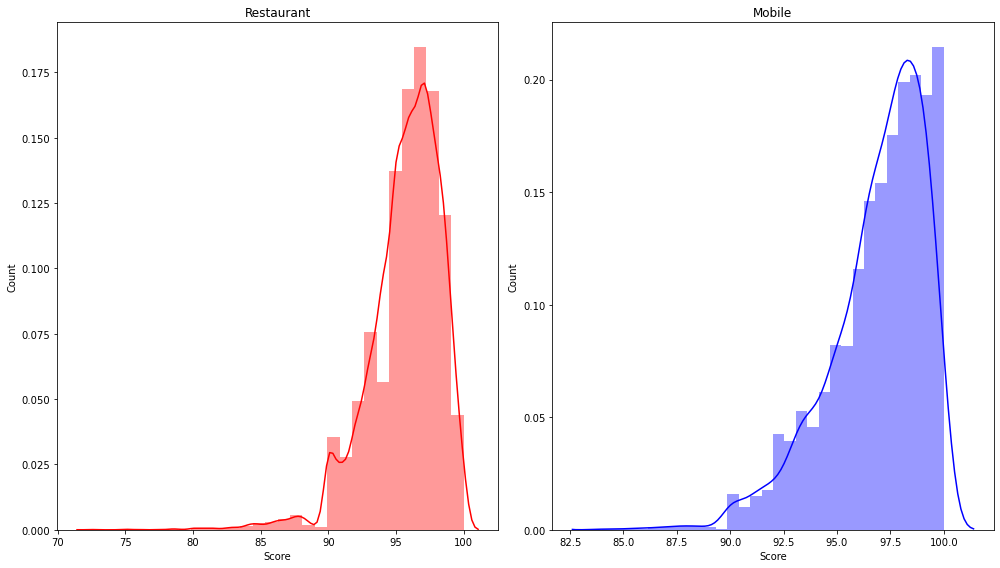

In [134]:
mobile = ['Mobile Food Units', 'Food Stand', 'Pushcarts']
grouped_types = [['Restaurant'], mobile]

# Initiate Plot
fig = plt.figure(figsize=(14,8))
fig_num = 120

for target in grouped_types:
    fig_num += 1
    ax = fig.add_subplot(fig_num)
    
    if fig_num == 121:
        target[0] = 'Restaurant'
    else:
        target[0] = 'Mobile'
    
    if target[0] == 'Restaurant':
        color = 'red'
    else:
        color = 'blue'

    sns.distplot(data[data['facilitytype'].isin(target)]['score'], color=color, bins=30)
    
    plt.title(target[0])
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.tight_layout()

We can see the distribution between the two groups are very similar.

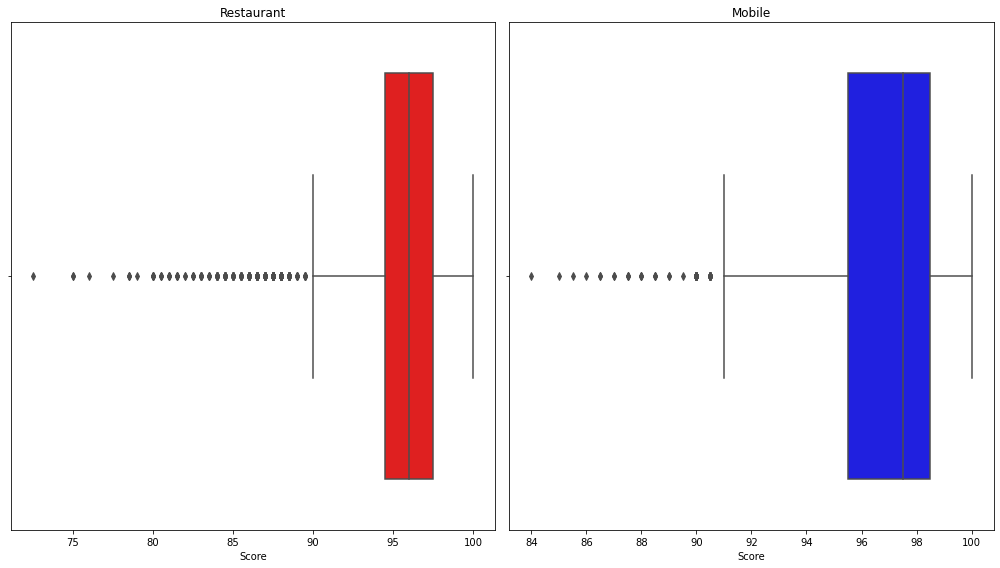

In [135]:
# Initiate Plot
fig = plt.figure(figsize=(14,8))
fig_num = 120

for target in grouped_types:
    fig_num += 1
    ax = fig.add_subplot(fig_num)
    
    if fig_num == 121:
        target[0] = 'Restaurant'
    else:
        target[0] = 'Mobile'
    
    if target[0] == 'Restaurant':
        color = 'red'
    else:
        color = 'blue'

    sns.boxplot(data[data['facilitytype'].isin(target)]['score'], color=color)
    
    plt.title(target[0] )
    plt.xlabel('Score')
    plt.tight_layout()

We can see there are some outliers, let's see exactly how many.

In [136]:
rest_data = data[data['facilitytype'] == 'Restaurant']
print(rest_data.shape)
rest_outliers = rest_data[rest_data['score'] < 90]
rest_dropped_outliers = rest_data[rest_data['score'] > 90]
rest_outliers

(11985, 3)


,hsisid,score,facilitytype
12998,4092010236,88.0,Restaurant
10735,4092010237,88.0,Restaurant
4694,4092010343,88.0,Restaurant
11598,4092010564,88.5,Restaurant
9975,4092010574,88.0,Restaurant
...,...,...,...
18361,4092017135,80.0,Restaurant
16721,4092017175,76.0,Restaurant
16771,4092017176,84.0,Restaurant
16731,4092017188,84.0,Restaurant


Of the 11985 restaurants, there are 254 outliers. This is about 2% of the restaurants.

In [137]:
mobi_data = data[data['facilitytype'].isin(mobile)]
print(mobi_data.shape)
mobi_outliers = mobi_data[mobi_data['score'] < 92.5]
mobi_dropped_outliers = mobi_data[mobi_data['score'] > 92.5]
mobi_outliers

(3380, 3)


,hsisid,score,facilitytype
16696,4092020040,91.0,Food Stand
6008,4092020045,91.5,Food Stand
1379,4092020045,92.0,Food Stand
15901,4092020119,92.0,Food Stand
12906,4092020119,90.0,Food Stand
...,...,...,...
16163,4092021934,92.0,Food Stand
18202,4092021937,91.0,Food Stand
16189,4092021939,92.0,Food Stand
18065,4092021964,87.0,Food Stand


Of the 3593 mobiles, there are 175 outliers. This is about 5% of the mobiles.

I consider these a small sample of the dataset, so I will be dropping the outliers to continue my analysis.

Creating the same plots above without the outliers:

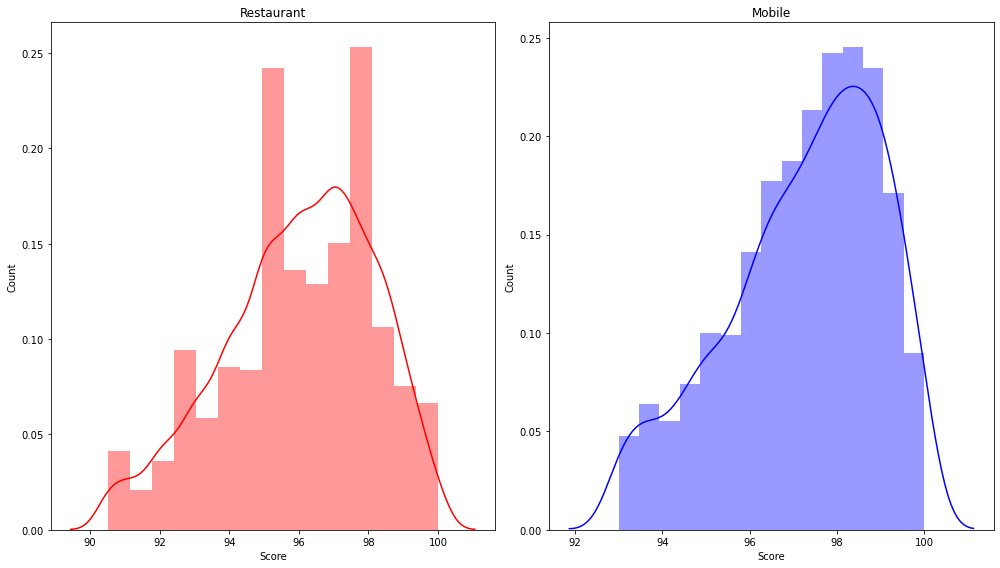

In [138]:
grouped_types = [['Restaurant'], mobile]

# Initiate Plot
fig = plt.figure(figsize=(14,8))
fig_num = 120

for frame in [rest_dropped_outliers, mobi_dropped_outliers]:
    fig_num += 1
    ax = fig.add_subplot(fig_num)
    
    if fig_num == 121:
        target[0] = 'Restaurant'
    else:
        target[0] = 'Mobile'
        
    if target[0] == 'Restaurant':
        color = 'red'
    else:
        color = 'blue'

    sns.distplot(frame['score'], color=color, bins=15)
    
    plt.title(target[0])
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.tight_layout()

We can see that mobiles scores and centered higher than restaurants. This means that the scores of mobiles are generally higher than those of restaurants.

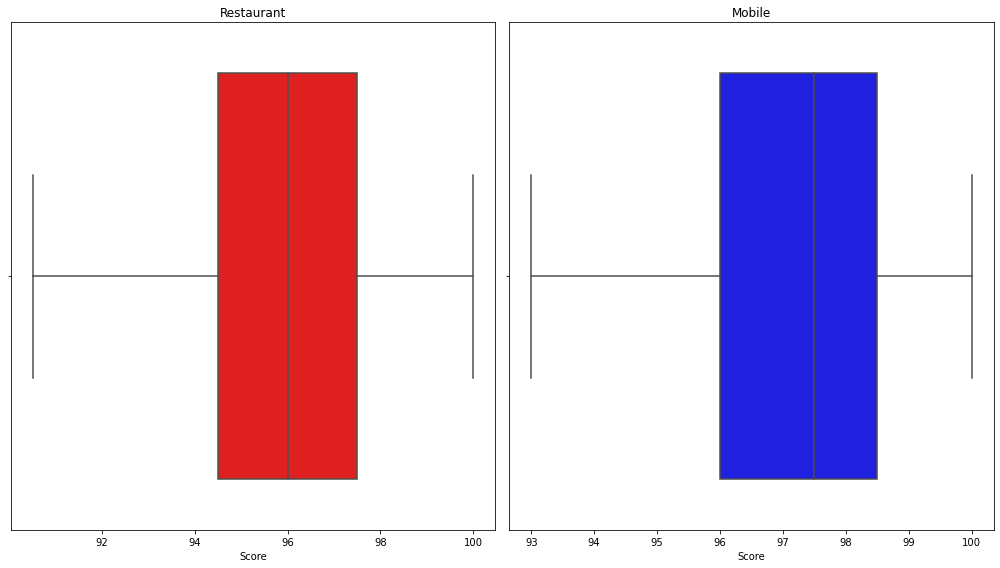

In [139]:
grouped_types = [['Restaurant'], mobile]

# Initiate Plot
fig = plt.figure(figsize=(14,8))
fig_num = 120

for frame in [rest_dropped_outliers, mobi_dropped_outliers]:
    fig_num += 1
    ax = fig.add_subplot(fig_num)
    
    if fig_num == 121:
        target[0] = 'Restaurant'
    else:
        target[0] = 'Mobile'
        
    if target[0] == 'Restaurant':
        color = 'red'
    else:
        color = 'blue'

    sns.boxplot(frame['score'], color=color)
    
    plt.title(target[0])
    plt.xlabel('Score')
    plt.tight_layout()

Here, again we see that the Mobiles have a slightly higher median than restaurants and the data is shifted slightly to the right compared to restaurants. This also supports the notion that mobiles scores are slightly better than restaurants.

### Analysis

When comparing the mean between two distributions, we have the option of the Z-test or the t-test. We will be using the Z-test because the t-test is used for a small sample size, such as sample size less than 50. The Z-test can be used the the sample size is above 50. The Z-test assumes that the two distributions are normally distributed and have the same standard deviation. Based on the plots above, we can see that the data is normally distributed

In [140]:
print('Mobile standard deviation: ', mobi_dropped_outliers['score'].std())
print('Restaurant standard deviation: ', rest_dropped_outliers['score'].std())

Mobile standard deviation:  1.7881816058443851
Restaurant standard deviation:  2.1565777982477936


Since the standard deviations are really similar, I believe we can us the Z-test.

Our null hypothesis will be that the mobiles score mean will be equal to the restaurants mean. <br>
h0 = mean(mobiles) = mean(restaurants)

Thus, our alternative will be the opposite, mobile score mean will be greater than the restaurant mean. <br>
h1 = mean(mobiles) > mean(restaurants)

We will use a significance level, alpha, of .05.

In [141]:
z_score, p_value = stats.ztest(mobi_dropped_outliers['score'], rest_dropped_outliers['score'], alternative='larger')
print('Z-score:', z_score, '| P-value:', p_value)

Z-score: 29.82876481127452 | P-value: 8.277497234156665e-196


After using the Z-test, we get a Z-score of 29, which can be converted into a p-value of 8.277497234156665e-196. Since the p-value is smaller than our alpha, we will reject the null hypothesis and believe that the mobile score mean is greather than the restaurant score mean. However, since this could be due to chance, we will use a bootstrapping method to sample the data.

In [142]:
rest = rest_dropped_outliers['score']
mobi = mobi_dropped_outliers['score']

sample_size = 1000
iterations = 1000
p_vals = []

for i in np.arange(iterations):
    rest_sample = rest.sample(sample_size).values
    mobi_sample = mobi.sample(sample_size).values
    
    z_score, p_value = stats.ztest(mobi_sample, rest_sample, alternative='larger')
    p_vals.append(p_value)
    
    
print('Average P-value across 1000 p-values with a sample size of 1000:', np.mean(p_vals))

Average P-value across 1000 p-values with a sample size of 1000: 4.8589658440240386e-33


The average p-value among the samples is still smaller than alpha, once again allowing us to reject the null hypothesis.

Based on our results, since our Z-test was able to reject the null hypothesis, we will believe that alternative hypothesis that mobile scores mean is higher than the restaurant scores mean. This follows our expectation from prior work as they also ended up with a similar result.

# Ethics & Privacy

This data set was given to us and and the features we cared about are something that could be found in public. It is mandatory for restaurants to post their health scores, and hsisids are a way to identify a restaurant which isn't something private. Facility types is also considered public knowledge since it is available for everyone to find out. The data does not contain any breach of ethics or privacy because it is entirely details that could be found in public. I don't believe that there are any biases in the dataset because the features we use could not cause problems of equity.

# Conclusion & Discussion

In this project, we attempt to reveal the truth behind the myth that food trucks, stands, and carts are unsafe compared to restaurants. To answer this, we use an inspection dataset that contains restaurants and their health scores to measure the safeness between the mobile units and restaurants. We are concerned about the average health scores among the two distributions, mobile units and restaurants which leads us to use the Z-tes, a test statistic that compares the means between two distributions. To reduce the probability that the results we get are due to chance, we will use the bootstrapping method to resample from the data in order to get results across many trials. This also helps us to meet the conditions of the Z-test, normal distribution and same sample size. After carrying out 1000 trials with a sample size of 1000, we ended up with a P-value below our significance level of .05. This allows us to reject the null hypothesis and believe the alternative. Thus, base on our analysis we believe that food trucks, stand, and carts are actually safer compared to restaurants.